In [2]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment
from quantopian.pipeline.data.morningstar import balance_sheet

In [3]:
def make_pipeline():
    testing_factor = balance_sheet.cash_and_cash_equivalents.latest
    universe = (Q1500US() & 
               testing_factor.notnull()) 
    testing_factor = testing_factor.rank(mask=universe, method = "average")
    pipe = Pipeline(columns={"testing_factor": testing_factor},
                    screen=universe)
    return pipe 

In [4]:
result = run_pipeline(make_pipeline(), start_date = "2015-01-01", end_date = "2016-01-01")

In [5]:
result.head()

testing_factor
2015-01-02 00:00:00+00:00 Equity(2 [ARNC])           1395.0
                          Equity(24 [AAPL])          1473.0
                          Equity(41 [ARCB])           548.0
                          Equity(62 [ABT])           1401.0
                          Equity(67 [ADSK])          1261.5

In [6]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets, start_date = "2014-12-01", end_date = "2016-02-01", fields = "open_price")

In [7]:
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = result["testing_factor"],
                                                                  prices = pricing,
                                                                  quantiles = 2,
                                                                  periods = (1,10,30))

Dropped 5.0% entries from factor data: 5.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Returns Analysis


,1D,10D,30D
Ann. alpha,0.021,0.026,0.029
beta,-0.002,-0.017,-0.004
Mean Period Wise Return Top Quantile (bps),0.715,0.953,1.154
Mean Period Wise Return Bottom Quantile (bps),-0.714,-0.953,-1.157
Mean Period Wise Spread (bps),1.430,1.905,2.311


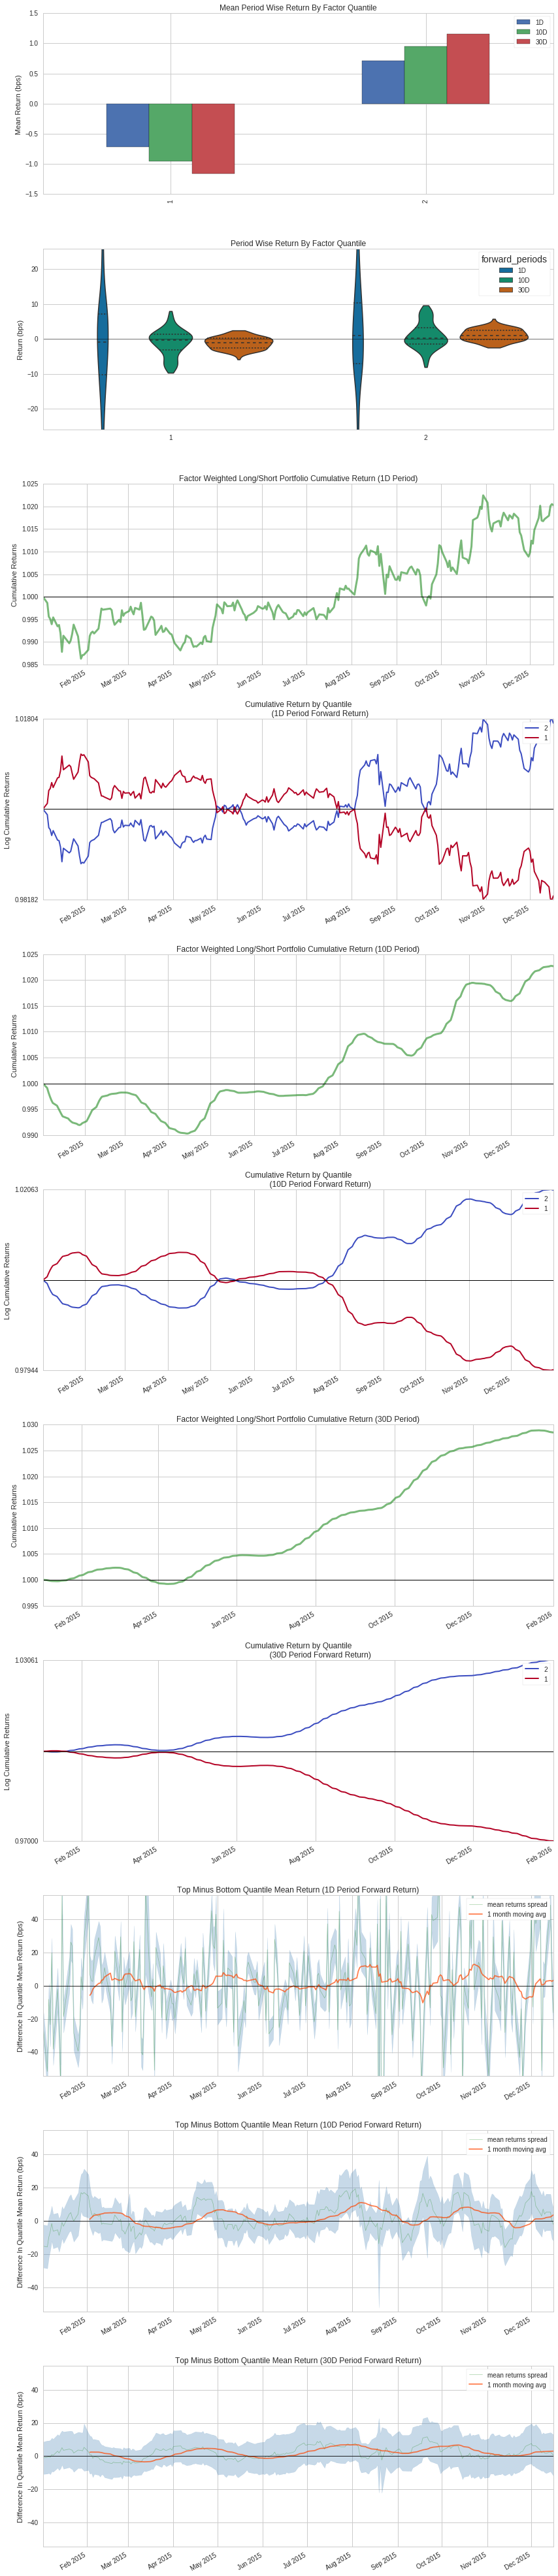

In [8]:
alphalens.tears.create_returns_tear_sheet(factor_data)